# Probabilidade e Estatística - Atividade 5

<img src="Arquivos/pe.jpg"  width=80%>

## PARTE A
### Considere, inicialmente, uma amostra aleatória simples (AAS) de 54 elementos, em que foram obtidos os dados referentes à IDADE, ALTURA, PESO e calculado o IMC (IMC = PESO/[ALTURA^2]). Obter:

In [380]:
# importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as std
import numpy as np
import statsmodels.api as sm
import random
import math
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

In [381]:
# importar amostra simples e exibir as 5 primeiras entradas
df = pd.read_csv("amostra_simples_ok.csv", sep = ';')
df.IMC_am = df.IMC_am.apply(lambda x: x.replace(',','.'))
df.IMC_am = df.IMC_am.astype(float)
df.head()

,Sexo_am,Idade_am,Peso_am,Altura_am,IES_am,IMC_am,ClassIMC_am
0,F,20,65,155,UFAC,27.1,ob
1,F,20,35,171,UFSCAR,12.0,mg
2,M,21,41,155,UFAC,17.1,mg
3,M,22,56,173,UFAC,18.7,ad
4,F,18,41,150,UFAC,18.2,mg


### A) Gráfico de dispersão entre as variáveis IDADE x ALTURA, IDADE x PESO, IDADE x IMC, ALTURA x PESO, ALTURA x IMC, PESO x IMC.

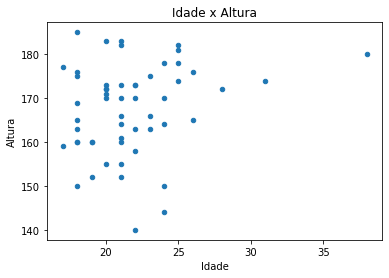

In [382]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'Idade_am', y = 'Altura_am', ax = ax)
ax.set_xlabel("Idade")
ax.set_ylabel("Altura")
ax.set_title("Idade x Altura")
plt.show()

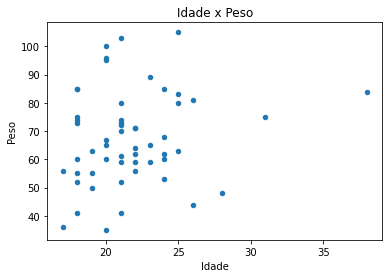

In [383]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'Idade_am', y = 'Peso_am', ax = ax)
ax.set_xlabel("Idade")
ax.set_ylabel("Peso")
ax.set_title("Idade x Peso")
plt.show()

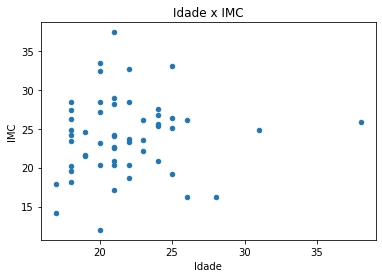

In [384]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'Idade_am', y = 'IMC_am', ax = ax)
ax.set_xlabel("Idade")
ax.set_ylabel("IMC")
ax.set_title("Idade x IMC")
plt.show()

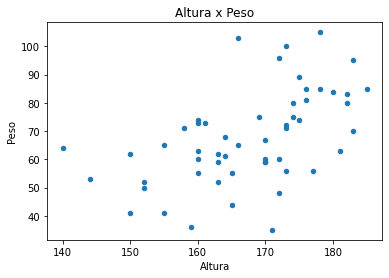

In [385]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'Altura_am', y = 'Peso_am', ax = ax)
ax.set_xlabel("Altura")
ax.set_ylabel("Peso")
ax.set_title("Altura x Peso")
plt.show()

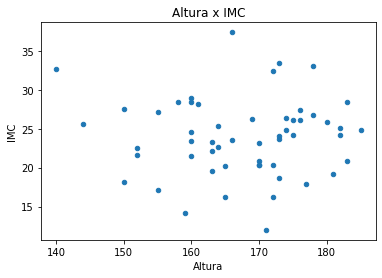

In [386]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'Altura_am', y = 'IMC_am', ax = ax)
ax.set_xlabel("Altura")
ax.set_ylabel("IMC")
ax.set_title("Altura x IMC")
plt.show()

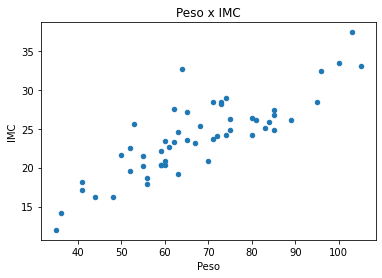

In [387]:
fig, ax = plt.subplots()
df.plot.scatter(x = 'Peso_am', y = 'IMC_am', ax = ax)
ax.set_xlabel("Peso")
ax.set_ylabel("IMC")
ax.set_title("Peso x IMC")
plt.show()

Observando os gráficos de dispersão podemos perceber que há a possibilidade de ter correlação entre Peso e IMC, Altura e Peso. Os demais gráficos estão meio disformes. Todavia, como o IMC utiliza o peso na sua constituição, bem como a altura, não faz sentido estudarmos esse conjunto de variáveis.

### b) O coeficiente de correlação de Pearson e o coeficiente de correlação de Spearman (postos) para os dois pares de variáveis que você considera mais interessantes e testá-los ao nível de 5% de significância.

## Pearson

In [388]:
# criar uma matriz de correlação
corr_df = df.corr(method='pearson');

# mostrar a matriz de correlação
display(corr_df);

,Idade_am,Peso_am,Altura_am,IMC_am
Idade_am,1.000000,0.185185,0.221239,0.087290
Peso_am,0.185185,1.000000,0.521904,0.840227
Altura_am,0.221239,0.521904,1.000000,-0.008318
IMC_am,0.087290,0.840227,-0.008318,1.000000


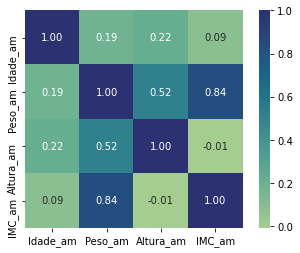

In [389]:
# plotar o gráfico de correlação
sns.heatmap(corr_df,cmap = 'crest', fmt='.2f',square = True, linecolor = 'white', annot = True);

### Altura e Peso

In [390]:
# criar uma matriz de correlação
corr_df = df[['Altura_am', 'Peso_am']].corr(method='pearson');
# mostrar a matriz de correlação
display(corr_df);

,Altura_am,Peso_am
Altura_am,1.000000,0.521904
Peso_am,0.521904,1.000000


In [391]:
r = 0.521904
r_2 = r ** 2
n = 54
print("R = ",r)
print("R² = ",round(r_2 * 100,2), "%")

R =  0.521904
R² =  27.24 %


### Teste de Hipóteses <br>
#### H0 : ρ = 0 <br>
#### HA : ρ ≠ 0

In [392]:
#Cálculo do tc
tc = (r * math.sqrt(n-2))/math.sqrt(1 - r_2)
print("Tc: ", round(tc,4))

Tc:  4.4121


In [393]:
# g.l = 54 - 2 = 52 com 5% de signficância.
t = stats.t.ppf(1-0.025, 52)
print ("Valor na t de student: ", t)

Valor na t de student:  2.0066468031022113


Como tc > t, a hipótese nula é rejeitada e dizemos que ao nível de 5% de significância, existe correlação positiva entre Altura e Peso na amostra simples.

Se pegarmos os dados da população, o R de altura e peso é 0.5311. Na amostra simples temos 0.5219, um valor que representa bem a população.

### Idade e Peso

In [394]:
# criar uma matriz de correlação
corr_df = df[['Idade_am', 'Peso_am']].corr(method='pearson');
# mostrar a matriz de correlação
display(corr_df);

,Idade_am,Peso_am
Idade_am,1.000000,0.185185
Peso_am,0.185185,1.000000


In [395]:
r = 0.185185
r_2 = r ** 2
n = 54
print("R = ",r)
print("R² = ",round(r_2 * 100,2), "%")

R =  0.185185
R² =  3.43 %


### Teste de Hipóteses <br>
#### H0 : ρ = 0 <br>
#### HA : ρ ≠ 0

In [396]:
#Cálculo do tc
tc = (r * math.sqrt(n-2))/math.sqrt(1 - r_2)
print("Tc: ", round(tc,4))

Tc:  1.3589


In [397]:
# g.l = 54 - 2 = 52 com 5% de signficância.
t = stats.t.ppf(1-0.025, 52)
print ("Valor na t de student: ", t)

Valor na t de student:  2.0066468031022113


Como tc < t, a hipótese nula não é rejeitada, logo não podemos afirmar correlação positiva ao nível de 5% de signficância.

Na população, o R de Idade e Peso é 0.093, na amostra é 0.1815, o que representa bem o estado na população.

## Spearman

In [398]:
# criar uma matriz de correlação
corr_df = df.corr(method='spearman');

# mostrar a matriz de correlação
display(corr_df);

,Idade_am,Peso_am,Altura_am,IMC_am
Idade_am,1.000000,0.168715,0.206606,0.127310
Peso_am,0.168715,1.000000,0.575555,0.822464
Altura_am,0.206606,0.575555,1.000000,0.061007
IMC_am,0.127310,0.822464,0.061007,1.000000


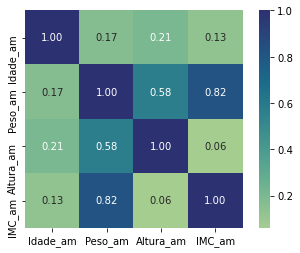

In [399]:
# plotar o gráfico de correlação
sns.heatmap(corr_df,cmap = 'crest', fmt='.2f',square = True, linecolor = 'white', annot = True);

### Altura e Peso

In [400]:
# criar uma matriz de correlação
corr_df = df[['Altura_am', 'Peso_am']].corr(method='spearman');
# mostrar a matriz de correlação
display(corr_df);

,Altura_am,Peso_am
Altura_am,1.000000,0.575555
Peso_am,0.575555,1.000000


In [401]:
r = 0.575555
r_2 = r ** 2
n = 54
print("R = ",r)
print("R² = ",round(r_2 * 100,2), "%")

R =  0.575555
R² =  33.13 %


### Teste de Hipóteses <br>
#### H0 : ρ = 0 <br>
#### HA : ρ ≠ 0

In [402]:
#Cálculo do tc
tc = (r * math.sqrt(n-2))/math.sqrt(1 - r_2)
print("Tc: ", round(tc,4))

Tc:  5.0753


In [403]:
# g.l = 54 - 2 = 52 com 5% de signficância.
t = stats.t.ppf(1-0.025, 52)
print ("Valor na t de student: ", t)

Valor na t de student:  2.0066468031022113


Como tc > t, a hipótese nula é rejeitada e dizemos que ao nível de 5% de significância, existe correlação positiva entre Altura e Peso.

### Idade e Peso

In [404]:
# criar uma matriz de correlação
corr_df = df[['Idade_am', 'Peso_am']].corr(method='spearman');
# mostrar a matriz de correlação
display(corr_df);

,Idade_am,Peso_am
Idade_am,1.000000,0.168715
Peso_am,0.168715,1.000000


In [405]:
r = 0.168715
r_2 = r ** 2
n = 54
print("R = ",r)
print("R² = ",round(r_2 * 100,2), "%")

R =  0.168715
R² =  2.85 %


### Teste de Hipóteses <br>
#### H0 : ρ = 0 <br>
#### HA : ρ ≠ 0

In [406]:
#Cálculo do tc
tc = (r * math.sqrt(n-2))/math.sqrt(1 - r_2)
print("Tc: ", round(tc,4))

Tc:  1.2343


In [407]:
# g.l = 54 - 2 = 52 com 5% de signficância.
t = stats.t.ppf(1-0.025, 52)
print ("Valor na t de student: ", t)

Valor na t de student:  2.0066468031022113


Como tc < t, a hipótese nula não é rejeitada, logo não podemos afirmar correlação positiva ao nível de 5% de signficância.

### c) Dentre os pares de variáveis listados no item a), escolha um deles e considere uma variável como sendo independente e a outra como variável dependente. Obtenha a reta de regressão linear e realize o teste de hipóteses sobre o coeficiente angular desta regressão através do quadro de Análise de regressão. Conclua, com base no teste de hipóteses e nos gráficos de dispersão.

### Altura e Peso

In [408]:
# Função que calcula a reta de regressão linear

def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(round(B0,3), round(B1, 3))
    
    return (B0, B1, reg_line)

In [409]:
# coeficiente de correlação, método de pearson

def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [410]:
# x é independente = altura
x = df['Altura_am']

# y é dependente = peso
y = df['Peso_am']

# Tamanho de x
N = len(x)

#Média de x e y
x_mean = x.mean()
y_mean = y.mean()

# calcula o B1
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

# calcula o BO
B0 = y_mean - (B1 * x_mean)

B0, B1, reg_line = linear_regression(x, y)
print('Reta de Regressão Linear: ', reg_line)
R = corr_coef(x, y)
print('R: ', round(R,3))
print("R²: ", round(R**2,3))

Reta de Regressão Linear:  y = -71.535 + 0.831β
R:  0.522
R²:  0.272


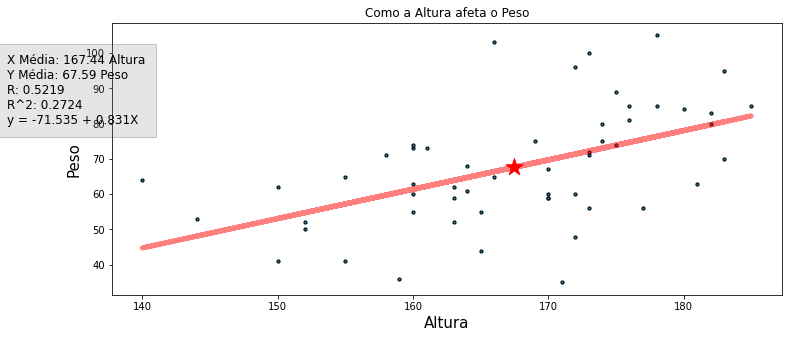

In [411]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=10, linewidths=1, edgecolor='black')
text = '''X Média: {} Altura
Y Média: {} Peso
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=130, y=80, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('Como a Altura afeta o Peso')
plt.xlabel('Altura', fontsize=15)
plt.ylabel('Peso', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r');

### Teste de hipótese

<img src="Arquivos/ars.png"  width=80%>

Podemos checar na tabela de análise de regressão (ver em amostra_simples_ok.xlsx), que o F-Calculado é 19.46. <br>
Iremos checar na tabela F para 1 gl no numerador e 52 gl<br>

In [412]:
print("F Tabelado = ", round(scipy.stats.f.ppf(q=1-0.05, dfn=1, dfd=52),3))

F Tabelado =  4.027




Como F calculado (19.46) é maior que o F tabelado, a hipótese nula de que o coeficiente angular é nulo é rejeitada, ou seja, existe regressão linear entre X e Y ao nível de 5% de significância.



### Considerando a Amostra Estratificada, por sexo, obtenha:


### a) Gráficos de dispersão (um para cada sexo, separadamente) entre duas variáveis que você ache mais interessante de ser estudada.

In [413]:
# importar amostra simples e exibir as 5 primeiras entradas
df_sexo = pd.read_csv("amostra_sexo_ok.csv", sep = ';')
df_sexo.IMC = df_sexo.IMC.apply(lambda x: x.replace(',','.'))
df_sexo.IMC = df_sexo.IMC.astype(float)
df_sexo.head()

,id,peso,altura,IES,sexo,IMC
0,19,78,181,UFAC,F,25.55358
1,19,68,159,UFAC,F,17.19108
2,19,59,177,UFAC,F,18.48411
3,20,72,163,UFSCAR,F,19.12968
4,20,63,168,UFAC,F,17.78112


### Mulheres

In [414]:
# criar dataframe para mulheres na amostra estratificada por sexo
df_f = df_sexo.loc[df_sexo.sexo == 'F']
df_f.shape[0]

26

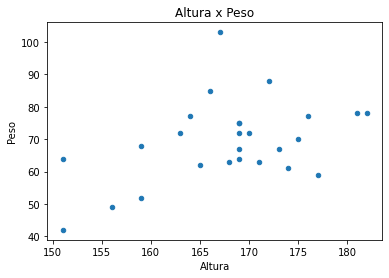

In [415]:
fig, ax = plt.subplots()
df_f.plot.scatter(x = 'altura', y = 'peso', ax = ax)
ax.set_xlabel("Altura")
ax.set_ylabel("Peso")
ax.set_title("Altura x Peso")
plt.show()

### Homens

In [416]:
# criar dataframe para homens na amostra estratificada por sexo
df_h = df_sexo.loc[df_sexo.sexo == 'M']
df_h.shape[0]

28

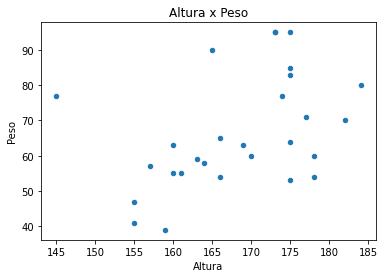

In [417]:
fig, ax = plt.subplots()
df_h.plot.scatter(x = 'altura', y = 'peso', ax = ax)
ax.set_xlabel("Altura")
ax.set_ylabel("Peso")
ax.set_title("Altura x Peso")
plt.show()

### Obtenha o coeficiente de correlação de Pearson e o coeficiente de correlação de postos (Spearman), para cada sexo, entre as variáveis escolhidas no item anterior (testar ao nível de 5% de significância).

### Mulheres

In [418]:
# Pearson
corr_df = df_f[['altura', 'peso']].corr(method='pearson');
# mostrar a matriz de correlação
display(corr_df);

,altura,peso
altura,1.000000,0.437348
peso,0.437348,1.000000


Na população, o valor de R para peso e altura é 0.4634 observando somente as mulheres. Na amostra, temos 0.4373.

In [419]:
# Spearman
corr_df = df_f[['altura', 'peso']].corr(method='spearman');
# mostrar a matriz de correlação
display(corr_df);

,altura,peso
altura,1.00000,0.32812
peso,0.32812,1.00000


In [420]:
r = 0.437348
r_2 = r ** 2
n = df_f.shape[0]
print("R = ",r)
print("R² = ",round(r_2 * 100,2), "%")
print("N = ", n)

R =  0.437348
R² =  19.13 %
N =  26


### Teste de Hipóteses <br>
#### H0 : ρ = 0 <br>
#### HA : ρ ≠ 0

In [421]:
#Cálculo do tc
tc = (r * math.sqrt(n-2))/math.sqrt(1 - r_2)
print("Tc: ", round(tc,4))

Tc:  2.3825


In [422]:
# g.l = 26 - 2 = 24 com 5% de signficância.
t = stats.t.ppf(1-0.025, n - 2)
print ("Valor na t de student: ", t)

Valor na t de student:  2.0638985616280205


Como tc > t, a hipótese nula é rejeitada e dizemos que ao nível de 5% de significância, existe correlação positiva entre Altura e Peso.

### Homens

In [423]:
# Pearson
corr_df = df_h[['altura', 'peso']].corr(method='pearson');
# mostrar a matriz de correlação
display(corr_df);

,altura,peso
altura,1.000000,0.420551
peso,0.420551,1.000000


In [424]:
# Spearman
corr_df = df_h[['altura', 'peso']].corr(method='spearman');
# mostrar a matriz de correlação
display(corr_df);

,altura,peso
altura,1.000000,0.432638
peso,0.432638,1.000000


In [425]:
r = 0.420551
r_2 = r ** 2
n = df_h.shape[0]
print("R = ",r)
print("R² = ",round(r_2 * 100,2), "%")
print("N = ", n)

R =  0.420551
R² =  17.69 %
N =  28


Na população, R equivale a 0.539 se observarmos os homens, já na amostra é 0.420.

### Teste de Hipóteses <br>
#### H0 : ρ = 0 <br>
#### HA : ρ ≠ 0

In [426]:
#Cálculo do tc
tc = (r * math.sqrt(n-2))/math.sqrt(1 - r_2)
print("Tc: ", round(tc,4))

Tc:  2.3636


In [427]:
# g.l = 28 - 2 = 26 com 5% de signficância.
t = stats.t.ppf(1-0.025, n - 2)
print ("Valor na t de student: ", t)

Valor na t de student:  2.055529438642871


Como tc > t, a hipótese nula é rejeitada e dizemos que ao nível de 5% de significância, existe correlação positiva entre Altura e Peso.

### Obtenha os parâmetros das retas de regressão (um por sexo) e teste-os utilizando os quadros de Análise de Regressão.

### Mulheres

In [428]:
# x é independente = altura
x = df_f['altura']

# y é dependente = peso
y = df_f['peso']

# Tamanho
N = len(x)
#Média de x e y
x_mean = x.mean()
y_mean = y.mean()

# calcula o B1
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

# calcula o BO
B0 = y_mean - (B1 * x_mean)

B0, B1, reg_line = linear_regression(x, y)
print('Reta de Regressão Linear: ', reg_line)
R = corr_coef(x, y)
print('R: ', round(R,3))
print("R²: ", round(R**2,3))

Reta de Regressão Linear:  y = -45.873 + 0.686β
R:  0.437
R²:  0.191


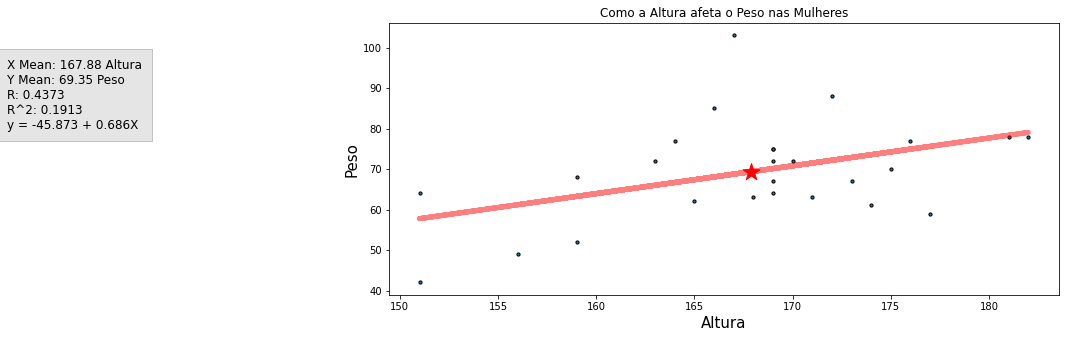

In [429]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=10, linewidths=1, edgecolor='black')
text = '''X Mean: {} Altura
Y Mean: {} Peso
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=130, y=80, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('Como a Altura afeta o Peso nas Mulheres')
plt.xlabel('Altura', fontsize=15)
plt.ylabel('Peso', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r');

### Teste de Hipótese

<img src="Arquivos/arf.png"  width=80%>

Podemos checar na tabela de análise de regressão (ver em amostra_sexo_ok.xlsx), que o F-Calculado é 5.67. <br>
Iremos checar na tabela F para 1 gl no numerador e 24 gl (4.26) <br>


In [430]:
print("F Tabelado = ", round(scipy.stats.f.ppf(q=1-0.05, dfn=1, dfd=24),3))

F Tabelado =  4.26


Como F calculado (5.67) é maior que o F tabelado, a hipótese nula de que o coeficiente angular é nulo é rejeitada, ou seja, existe regressão linear entre X e Y ao nível de 5% de significância.


### Homens

In [431]:
# x é independente = altura
x = df_h['altura']

# y é dependente = peso
y = df_h['peso']

# Tamanho
N = len(x)
#Média de x e y
x_mean = x.mean()
y_mean = y.mean()

# calcula o B1
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

# calcula o BO
B0 = y_mean - (B1 * x_mean)

B0, B1, reg_line = linear_regression(x, y)
print('Reta de Regressão Linear: ', reg_line)
R = corr_coef(x, y)
print('R: ', round(R,3))
print("R²: ", round(R**2,3))

Reta de Regressão Linear:  y = -54.201 + 0.718β
R:  0.421
R²:  0.177


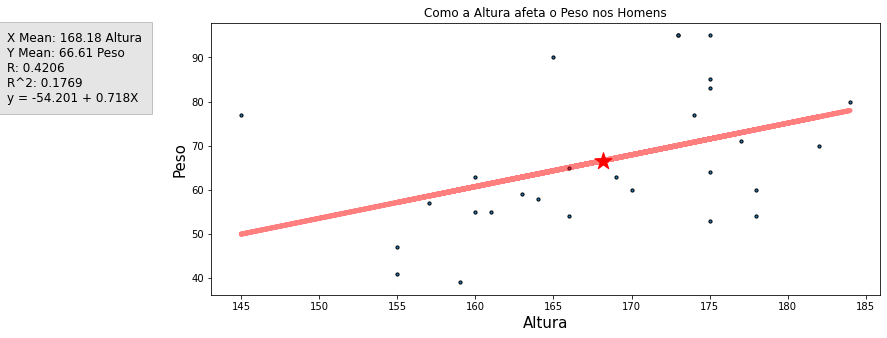

In [432]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=10, linewidths=1, edgecolor='black')
text = '''X Mean: {} Altura
Y Mean: {} Peso
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=130, y=80, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('Como a Altura afeta o Peso nos Homens')
plt.xlabel('Altura', fontsize=15)
plt.ylabel('Peso', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r');

### Teste de Hipótese

<img src="Arquivos/arm.png"  width=80%>

Podemos checar na tabela de análise de regressão (ver em amostra_sexo_ok.xlsx), que o F-Calculado é 5.58. <br>
Iremos checar na tabela F para 1 gl no numerador e 26 gl (4.23) <br>

In [433]:
print("F Tabelado = ", round(scipy.stats.f.ppf(q=1-0.05, dfn=1, dfd=26),3))

F Tabelado =  4.225


Como F calculado (5.58) é maior que o F tabelado, a hipótese nula de que o coeficiente angular é nulo é rejeitada, ou seja, existe regressão linear entre X e Y ao nível de 5% de significância.



### Conclusão

Podemos concluir que tanto na amostra simples, quanto na estratificada por sexo, há a correlação entre Altura e Peso, e a regressão linear não é nula. Os resultados, contudo, não se diferenciam tanto ao observar as amostras diferentes, são bem aproximados, então as duas amostras refletem num todo a população e são passíveis para trabalhar.